Epoch [100/500], Loss: 17.3250
Epoch [200/500], Loss: 2.4764
Epoch [300/500], Loss: 1.7713
Epoch [400/500], Loss: 1.7171
Epoch [500/500], Loss: 1.6829


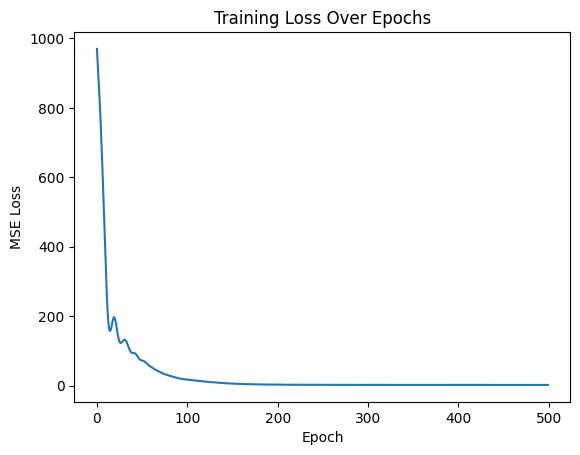

In [4]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

# Step-1: Generate synthetic dataset
X = torch.unsqueeze(torch.linspace(-5, 5, 100), dim=1)
y = 0.5 * X**3 - X**2 + 2*X + torch.rand(X.size()) * 5  # y = 0.5(x^3) - x^2 + 2x + noise  (non-linear function)

# Step-2: Define Deep Neural Network model using nn.Module
class DeepNN(nn.Module):
    def __init__(self):
        super(DeepNN, self).__init__()

        # Input (1D) → 64 → ReLU → 64 → ReLU → Output (1D)
        self.model = nn.Sequential(
            nn.Linear(1, 64),
            nn.ReLU(),
            nn.Linear(64, 64),
            nn.ReLU(),
            nn.Linear(64, 1)
        )

    def forward(self, x):
        return self.model(x)

model = DeepNN()

# Step-3: Loss and Optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

# Step-4: Training loop
epochs = 500
losses =[]

for epoch in range(epochs):
    model.train()
    pred_y = model(X)
    loss = criterion(pred_y, y)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    losses.append(loss.item()
                  )
    if (epoch + 1) % 100 == 0:
        print(f"Epoch [{epoch + 1}/{epochs}], Loss: {loss.item():.4f}")

# Step-5: Plot loss curve
plt.plot(losses)
plt.title("Training Loss Over Epochs")
plt.xlabel("Epoch")
plt.ylabel("MSE Loss")
plt.show()

